In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import seaborn as sns
from sklearn.model_selection import train_test_split

In [5]:
def keepfirstnhours(data, n, eventtime):
    data[eventtime]= pd.to_datetime(data[eventtime])
    data["admittime"]= pd.to_datetime(data["admittime"])
    # calculate the number of hours since admission 
    data['hour'] = np.floor((data[eventtime] - data['admittime']) / pd.Timedelta(hours=1)).astype(int)

    # remove rows where hours higher than n 
    newdata = data[data["hour"] < n]

    # use hours since admission as time instead of timestamp 
    return newdata

In [ ]:
# lab events to keep
#'CBC'
#'ABG'
#'Electrolytes'
#'Urinalysis'
#'Glucose'

In [6]:
labLabels = {"lymphocytes":"CBC", "neutrophils":"CBC", "eosinophils":"CBC",
    "hemoglobin":"CBC", "hematocrit":"CBC", "blood cells":"CBC", "mc":"CBC", "blood":"CBC" , "platelet":"CBC", "rdw":"CBC", "rbc":"CBC", "wbc":"CBC",'poikilocytosis':"CBC", 'hypochromia':"CBC", "microcytes":"CBC", 'polychromasia':"CBC", 'anisocytosis':"CBC", 'macrocytes':"CBC", "monocyte":"CBC",
                "o2":"ABG", "base excess":"ABG", "oxygen":"ABG","alveolar-arterial":"ABG",
                "calcium":"Calcium",
                "potassium":"Electrolytes", "chloride":"Electrolytes", "sodium":"Electrolytes", 
                 "glucose":"Glucose"}
             

In [7]:
labData = pd.read_csv("labevents.csv")
labData["label"] = labData["label"].str.lower()
labData = labData.replace(',','', regex=True)
labData["label"]= labData["label"].str.replace(r"^ +| +$", r"", regex=True)

In [8]:
labData["label1"] = labData["label"] + " " + labData["fluid"]

In [168]:
# keep first 7 days after admission time
labData_168 = keepfirstnhours(labData, 168,"charttime")

In [169]:
labData_168t = labData_168[labData_168["hadm_id"]==28737610]

In [160]:
labData_168t

,hadm_id,charttime,label,fluid,admittime,label1,hour
0,28737610,2154-03-27 12:22:00,ph,Blood,2154-03-27 07:45:00,ph Blood,4
1419,28737610,2154-03-27 15:04:00,glucose,Blood,2154-03-27 07:45:00,glucose Blood,7
4881,28737610,2154-03-30 05:42:00,urea nitrogen,Blood,2154-03-27 07:45:00,urea nitrogen Blood,69
6097,28737610,2154-03-28 12:15:00,calcium total,Blood,2154-03-27 07:45:00,calcium total Blood,28
8376,28737610,2154-03-27 09:24:00,hematocrit calculated,Blood,2154-03-27 07:45:00,hematocrit calculated Blood,1
...,...,...,...,...,...,...,...
249761,28737610,2154-03-30 05:42:00,rdw,Blood,2154-03-27 07:45:00,rdw Blood,69
250086,28737610,2154-03-27 12:22:00,calculated total co2,Blood,2154-03-27 07:45:00,calculated total co2 Blood,4
251241,28737610,2154-03-29 05:47:00,inr(pt),Blood,2154-03-27 07:45:00,inr(pt) Blood,46
251560,28737610,2154-03-30 05:42:00,anion gap,Blood,2154-03-27 07:45:00,anion gap Blood,69


In [170]:
labGroups = {}
for event in list(set(labData_168["label1"])):
    if "Urine" in event: labGroups[event]="Urinalysis"
    elif event == "ph Blood": labGroups[event]="ABG"
    else:
        for l in labLabels:
            if l in event:
                labGroups[event] = labLabels[l]
    

In [171]:
# remove rows that have not been grouped
labData_168_grouped = labData_168[labData_168['label1'].isin(labGroups.keys())]

# map group labels to data
labData_168_grouped = labData_168_grouped.replace({"label1": labGroups})

In [172]:
labData_168_groupedt = labData_168_grouped[labData_168_grouped["hadm_id"]==28737610]

In [184]:
labData_168_groupedt

,hadm_id,charttime,label,fluid,admittime,label1,hour,time
0,28737610,2154-03-27 12:22:00,ph,Blood,2154-03-27 07:45:00,ABG,4,2154-03-27 12:22:00
1419,28737610,2154-03-27 15:04:00,glucose,Blood,2154-03-27 07:45:00,Glucose,7,2154-03-27 15:04:00
6097,28737610,2154-03-28 12:15:00,calcium total,Blood,2154-03-27 07:45:00,Calcium,28,2154-03-28 12:15:00
8376,28737610,2154-03-27 09:24:00,hematocrit calculated,Blood,2154-03-27 07:45:00,CBC,1,2154-03-27 09:24:00
8377,28737610,2154-03-27 18:00:00,oxygen,Blood,2154-03-27 07:45:00,ABG,10,2154-03-27 18:00:00
...,...,...,...,...,...,...,...,...
246793,28737610,2154-03-27 09:24:00,pco2,Blood,2154-03-27 07:45:00,ABG,1,2154-03-27 09:24:00
248253,28737610,2154-03-29 05:47:00,platelet count,Blood,2154-03-27 07:45:00,CBC,46,2154-03-29 05:47:00
249018,28737610,2154-03-27 13:35:00,eosinophils,Blood,2154-03-27 07:45:00,CBC,5,2154-03-27 13:35:00
249761,28737610,2154-03-30 05:42:00,rdw,Blood,2154-03-27 07:45:00,CBC,69,2154-03-30 05:42:00


In [3]:
plt.hist(labData_168_grouped[labData_168_grouped["label1"]=="Urinalysis"]["hour"])

NameError: name 'labData_168_grouped' is not defined

In [7]:
medicationData = pd.read_csv("inputevents.csv")

In [18]:
medicationData 

,hadm_id,admittime,starttime,label,category,ordercategoryname
0,29441116,2131-12-09 07:15:00,2131-12-11 09:00:00,Insulin - 70/30,Medications,06-Insulin (Non IV)
1,29441116,2131-12-09 07:15:00,2131-12-13 11:30:00,Insulin - 70/30,Medications,06-Insulin (Non IV)
2,29441116,2131-12-09 07:15:00,2131-12-13 11:30:00,Insulin - 70/30,Medications,06-Insulin (Non IV)
3,29441116,2131-12-09 07:15:00,2131-12-13 08:00:00,Insulin - 70/30,Medications,06-Insulin (Non IV)
4,29441116,2131-12-09 07:15:00,2131-12-13 06:29:00,Insulin - 70/30,Medications,06-Insulin (Non IV)
...,...,...,...,...,...,...
10323,20317570,2183-12-04 07:15:00,2183-12-10 10:26:00,Piperacillin/Tazobactam (Zosyn),Antibiotics,08-Antibiotics (IV)
10324,20317570,2183-12-04 07:15:00,2183-12-10 18:00:00,Piperacillin/Tazobactam (Zosyn),Antibiotics,08-Antibiotics (IV)
10325,21506797,2139-04-05 07:15:00,2139-04-09 00:23:00,Piperacillin/Tazobactam (Zosyn),Antibiotics,08-Antibiotics (IV)
10326,21506797,2139-04-05 07:15:00,2139-04-09 07:35:00,Piperacillin/Tazobactam (Zosyn),Antibiotics,08-Antibiotics (IV)


In [78]:
medicationData["label1"] = medicationData["ordercategoryname"]
medicationLabels = {'06-Insulin (Non IV)':"Insulin", 
                    '07-Blood Products':"Blood Products", 
                    '08-Antibiotics (IV)':"Antibiotics",
                    '09-Antibiotics (Non IV)':"Antibiotics"}

In [176]:
# keep first 7 days after admission time
medicationData_168 = keepfirstnhours(medicationData, 168,"starttime")
medicationData_168_grouped = medicationData_168.replace({"label1": medicationLabels})

In [ ]:
labData_168_grouped["hadm_id"]==28737610

In [186]:
medicationData_168_groupedt = medicationData_168_grouped[medicationData_168_grouped["hadm_id"]==28737610]
medicationData_168t= medicationData_168[medicationData_168["hadm_id"]==28737610]

In [204]:
dischargeData = pd.read_csv("admissionevents.csv")
dischargeData["label1"] = "Discharged"
dischargeData_168 = keepfirstnhours(dischargeData, 168,"dischtime")

In [207]:
dischargeData_168

,hadm_id,admittime,dischtime,label1,hour
0,28108097,2125-05-06 15:15:00,2125-05-10 14:56:00,Discharged,95
1,24824855,2181-08-17 13:00:00,2181-08-21 17:15:00,Discharged,100
2,20050936,2171-02-05 07:15:00,2171-02-09 18:14:00,Discharged,106
3,29227687,2173-10-10 08:00:00,2173-10-15 16:00:00,Discharged,128
6,23853360,2133-01-14 07:45:00,2133-01-18 15:10:00,Discharged,103
...,...,...,...,...,...
916,22427428,2156-08-30 01:08:00,2156-09-03 17:00:00,Discharged,111
917,22525882,2143-02-07 10:45:00,2143-02-11 17:14:00,Discharged,102
918,25977623,2130-10-13 00:00:00,2130-10-17 17:20:00,Discharged,113
919,24175061,2173-05-25 00:00:00,2173-05-30 18:46:00,Discharged,138


In [178]:
labData_168_groupedt["time"] = labData_168_groupedt["charttime"]

/var/folders/1j/_vv7n2wd6j11jfd9ybmtpnz80000gn/T/ipykernel_14332/4246583485.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  labData_168_groupedt["time"] = labData_168_groupedt["charttime"]


In [187]:
medicationData_168t["time"] = medicationData_168t["starttime"]

/var/folders/1j/_vv7n2wd6j11jfd9ybmtpnz80000gn/T/ipykernel_14332/2120240472.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  medicationData_168t["time"] = medicationData_168t["starttime"]


In [188]:
medicationData_168t=medicationData_168t.replace({"label1": {"08-Antibiotics (IV)":"Antibiotics", "06-Insulin (Non IV)":"Insulin"}})

In [189]:
labData_168_groupedt0= labData_168_groupedt[["time", "label", "label1"]]
medicationData_168t0= medicationData_168t[["time", "label", "label1"]]
beforecombinedt0 = pd.concat([labData_168_groupedt0, medicationData_168t0])

In [53]:
labData_168_groupedt1= labData_168_groupedt[["hadm_id", "hour", "label"]]
medicationData_168t1= medicationData_168t[["hadm_id", "hour", "label"]]
beforecombinedt = pd.concat([labData_168_groupedt1, medicationData_168t1])

In [55]:
labData_168_colst = labData_168_groupedt[["hadm_id", "hour", "label1"]]
medicationData_168_colst = medicationData_168_groupedt[["hadm_id", "hour", "label1"]]
combinedt = pd.concat([labData_168_colst, medicationData_168_colst])

In [200]:
combinedt

,hadm_id,hour,label1
0,28737610,4,ABG
1419,28737610,7,Glucose
6097,28737610,28,Calcium
8376,28737610,1,CBC
8377,28737610,10,ABG
...,...,...,...
3176,28737610,10,Antibiotics
3177,28737610,26,Antibiotics
6362,28737610,7,Insulin
6363,28737610,28,Insulin


In [54]:
beforecombinedt.sort_values(by=['hour'])

,hadm_id,hour,label
99999,28737610,1,ph
246793,28737610,1,pco2
96455,28737610,1,base excess
161571,28737610,1,free calcium
26009,28737610,1,potassium whole blood
...,...,...,...
123106,28737610,92,mcv
240069,28737610,92,platelet count
90970,28737610,92,hematocrit
80048,28737610,92,hemoglobin


In [87]:
def drawtrajectory(dataframe, time, label, title):
    dataframe = dataframe.sort_values(by=['label1'])
    plt.figure(figsize=(8, 6))
    # To draw scatter time series plot of the given dataframe
    #plt.plot_date(dataframe.time, dataframe.label)
    sns.scatterplot(x="time", y="label", data=dataframe)

    # rotating the x-axis tick labels at 30degree towards right
    plt.xticks(rotation=30, ha='right')

    # Giving title to the chart using plt.title
    plt.title(title)

    # Providing x and y label to the chart
    plt.xlabel('Time')
    plt.ylabel('Event')

def drawtrajectory1(dataframe, time, label, group, title, legend=True):
    dataframe = dataframe.sort_values(by=['label1'])
    plt.figure(figsize=(8, 6))
    # To draw scatter time series plot of the given dataframe
    #plt.plot_date(dataframe.time, dataframe.label)
    sns.scatterplot(x=time, y=label, data=dataframe,hue=group)

    # rotating the x-axis tick labels at 30degree towards right
    plt.xticks(rotation=30, ha='right')

    plt.title(title)
    
    if legend==False: plt.legend([],[], frameon=False)
    plt.xlabel('Time')
    plt.ylabel('Event')

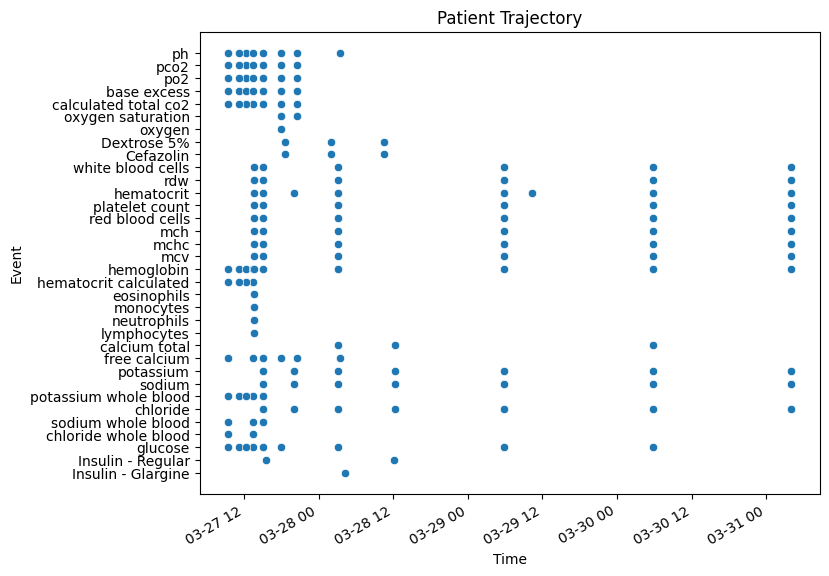

In [197]:
drawtrajectory(beforecombinedt0, "time", "label","Patient Trajectory")

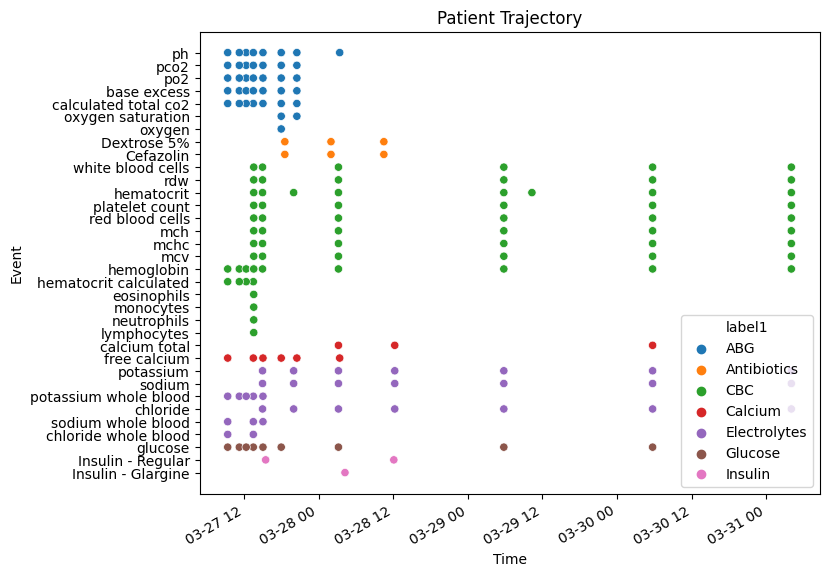

In [192]:
drawtrajectory1(beforecombinedt0, "time", "label","label1","Patient Trajectory")

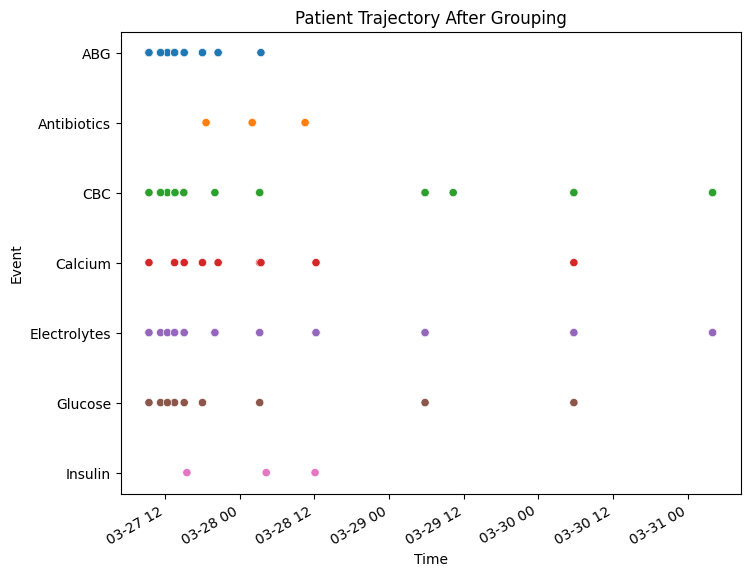

In [345]:
drawtrajectory1(beforecombinedt0, "time", "label1","label1",'Patient Trajectory After Grouping',False)

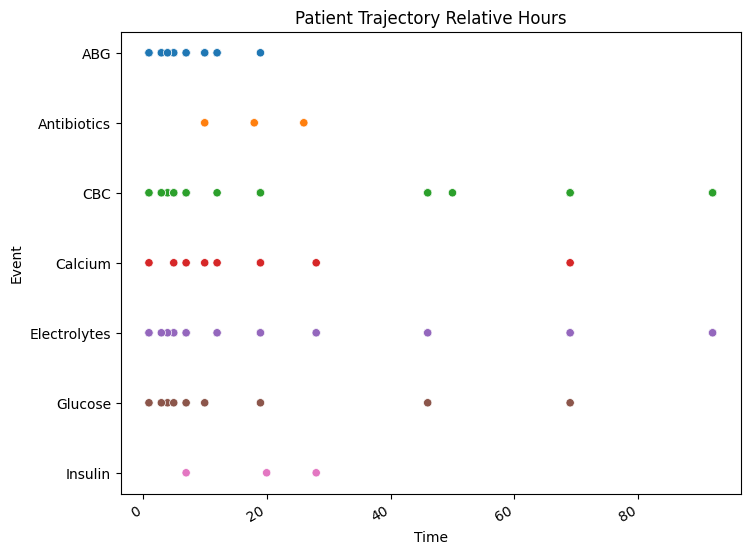

In [103]:
drawtrajectory1(combinedt, "hour", "label1","label1",'Patient Trajectory Relative Hours',False)

In [89]:
combinedt = combined[combined['hadm_id']==28737610]

In [97]:
combinedt = combinedt[~combinedt["label1"].isin(["Lactate", "PT", "Ventilation", "Leukocytes"])]

In [101]:
combinedt["Group"] = combinedt["label1"]

/var/folders/1j/_vv7n2wd6j11jfd9ybmtpnz80000gn/T/ipykernel_4828/1729578008.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combinedt["Group"] = combinedt["label1"]


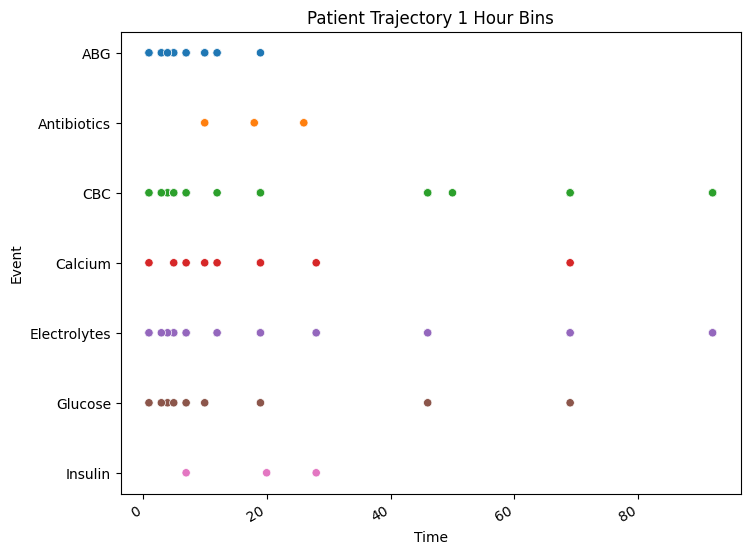

In [104]:
drawtrajectory1(combinedt, "hour", "Group","Group",'Patient Trajectory 1 Hour Bins',False)

In [109]:
combinedt["bucket"] = (combinedt["hour"]//12)*12

/var/folders/1j/_vv7n2wd6j11jfd9ybmtpnz80000gn/T/ipykernel_4828/2486795589.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combinedt["bucket"] = (combinedt["hour"]//12)*12


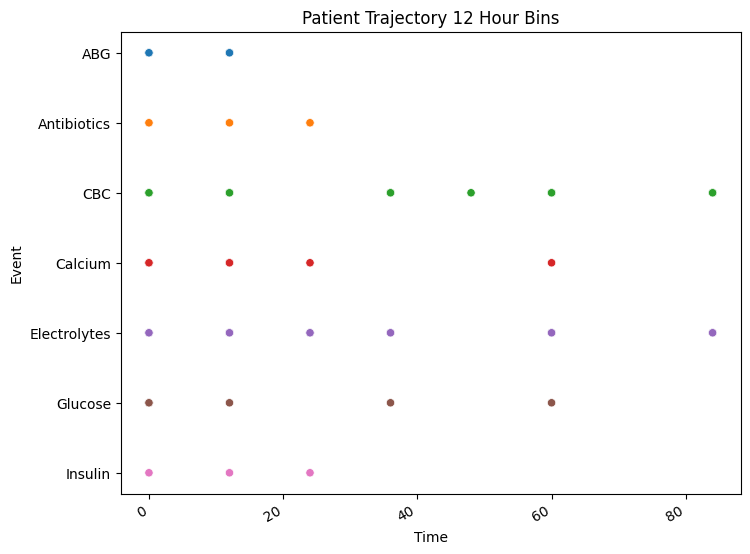

In [110]:
drawtrajectory1(combinedt, "bucket", "Group","Group",'Patient Trajectory 12 Hour Bins',False)

In [347]:
combinedt["bucket"] = (combinedt["hour"]//2)*2

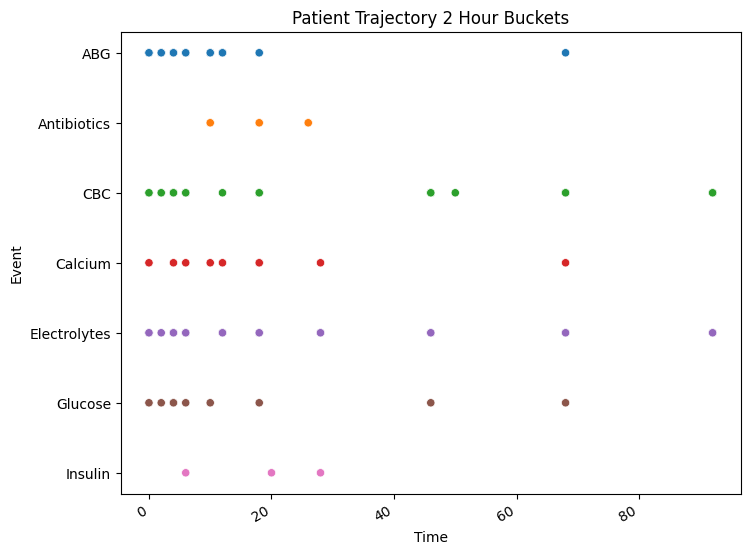

In [348]:
drawtrajectory1(combinedt, "bucket", "label1","label1",'Patient Trajectory 2 Hour Buckets', False)

In [246]:
combinedt=combinedt.drop(["bucket"],axis=1)

In [247]:
combined_formattedt = reformathourlybuckets(combinedt, 2)

In [249]:
combined_formattedt=combined_formattedt.drop(["hadm_id"],axis=1)

In [251]:
combined_formattedt.to_csv("exampletrajectory.csv")

In [224]:
# combined data
labData_168_cols = labData_168_grouped[["hadm_id", "hour", "label1"]]
medicationData_168_cols = medicationData_168_grouped[["hadm_id", "hour", "label1"]]
dischargeData_168_cols = dischargeData_168[["hadm_id", "hour", "label1"]]

combined = pd.concat([labData_168_cols, medicationData_168_cols, dischargeData_168_cols])

In [254]:
def drawtrajectory2(dataframe, time, label, group, title):
    dataframe = dataframe.sort_values(by=['label1'])
    plt.figure(figsize=(8, 6))
    # To draw scatter time series plot of the given dataframe
    #plt.plot_date(dataframe.time, dataframe.label)
    sns.scatterplot(x=time, y=label, data=dataframe,hue=group,alpha=0.2)

    # rotating the x-axis tick labels at 30degree towards right
    plt.xticks(rotation=30, ha='right')

    # Giving title to the chart using plt.title
    plt.title(title)

    # Providing x and y label to the chart
    plt.xlabel('Time')
    plt.ylabel('Event')

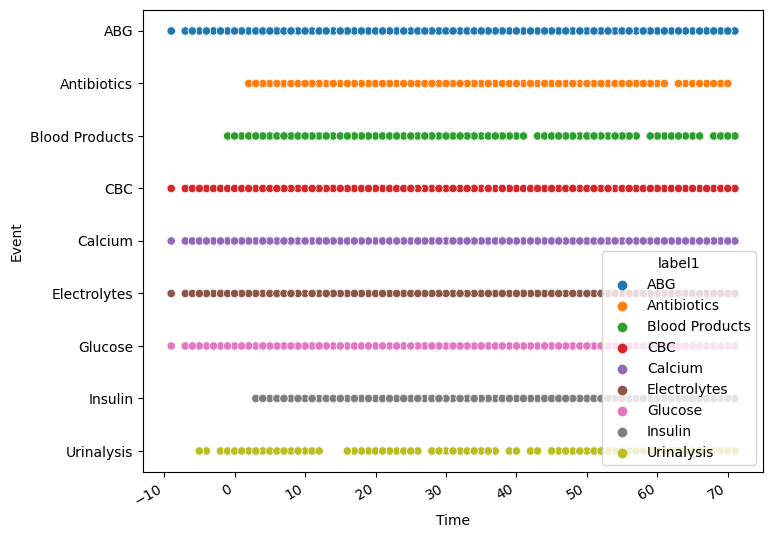

In [255]:
drawtrajectory1(combined, "hour", "label1","label1",'')

In [256]:
combined

,hadm_id,hour,label1
0,28737610,4,ABG
1,22325703,7,Calcium
2,20468701,7,Calcium
4,28487115,0,ABG
5,28487115,6,ABG
...,...,...,...
10283,20575513,50,Antibiotics
10308,20575513,70,Antibiotics
10315,20575513,42,Antibiotics
10317,29923776,54,Antibiotics


In [252]:
combined

,hadm_id,hour,label1
0,28737610,4,ABG
1,22325703,7,Calcium
2,20468701,7,Calcium
4,28487115,0,ABG
5,28487115,6,ABG
...,...,...,...
10283,20575513,50,Antibiotics
10308,20575513,70,Antibiotics
10315,20575513,42,Antibiotics
10317,29923776,54,Antibiotics


In [ ]:
plt.hist()

In [27]:
def reformathourlybuckets(data,hoursPerBucket):
    maxHour = max(data["hour"])
    ids = list(set(data["hadm_id"]))
    events = list(set(data["label1"]))
    # give each event an index 
    eventlookup = {}
    for index in range(len(events)):
        eventlookup[events[index]] = index + 2
    reformatted = []
    for i in ids:
        entries = data[data["hadm_id"]==i]
        for timestep in range(0, maxHour, hoursPerBucket):
            row = [0]*(len(events)+2)
            row[0] = i
            row[1] = timestep 
            for event in list(entries.loc[(entries["hour"]>=timestep) & (entries["hour"]<timestep+hoursPerBucket)]["label1"]):
                row[eventlookup[event]] = 1
            
            reformatted.append(row)
    column_names = ["hadm_id", "hour"]+events
    return pd.DataFrame(reformatted, columns=column_names)

In [16]:
combined_formatted = reformathourlybuckets(combined, 2)

NameError: name 'combined' is not defined

In [227]:
# remove hadm_ids that dont have a discharge time
remove = combined_formatted.groupby(['hadm_id'])['Discharged'].sum()
remove = remove[remove==0]
remove = remove.reset_index()
remove = list(remove["hadm_id"])
combined_formatted_1 = combined_formatted[~combined_formatted["hadm_id"].isin(remove)]

In [228]:
# separate into 70% training and 30% testing datasets based on stratified sampling method

In [18]:
from sklearn.model_selection import train_test_split

In [230]:
combined_train_ids, combined_test_ids = train_test_split(list(set(combined_formatted_1["hadm_id"])), test_size=0.3, random_state=499)
combined_train = combined_formatted_1[combined_formatted_1["hadm_id"].isin(combined_train_ids)]
combined_test = combined_formatted_1[combined_formatted_1["hadm_id"].isin(combined_test_ids)]
combined_train.to_csv('data_168_2_train.csv',index=False)
combined_test.to_csv('data_168_2_test.csv',index=False)

In [74]:
combined_train.groupby('hour').sum().to_csv('eval.csv',index=False)

In [142]:
temp = combined_formatted_1[combined_formatted_1["hadm_id"] == 27391981]
temp

,hadm_id,hour,ABG,Insulin,Calcium,Blood Products,Antibiotics,Electrolytes,Glucose,Discharged,CBC,Urinalysis
12824,27391981,0,1,0,0,0,0,1,1,0,1,1
12825,27391981,12,0,0,0,0,0,0,0,0,0,0
12826,27391981,24,0,0,0,0,0,0,0,0,0,0
12827,27391981,36,1,0,1,0,0,1,1,0,1,0
12828,27391981,48,1,1,1,0,1,1,1,0,1,0
12829,27391981,60,1,1,1,1,1,1,1,0,0,0
12830,27391981,72,1,0,1,0,0,1,1,0,1,1
12831,27391981,84,1,0,1,1,0,1,1,0,1,1
12832,27391981,96,1,0,0,1,0,1,1,0,1,0
12833,27391981,108,0,0,0,0,0,0,0,0,0,0


(array([197.,  67.,  42.,  55.,  20.,   6.,  13.,   4.,   1.,   4.]),
 array([  0. ,  15.6,  31.2,  46.8,  62.4,  78. ,  93.6, 109.2, 124.8,
        140.4, 156. ]),
 <BarContainer object of 10 artists>)

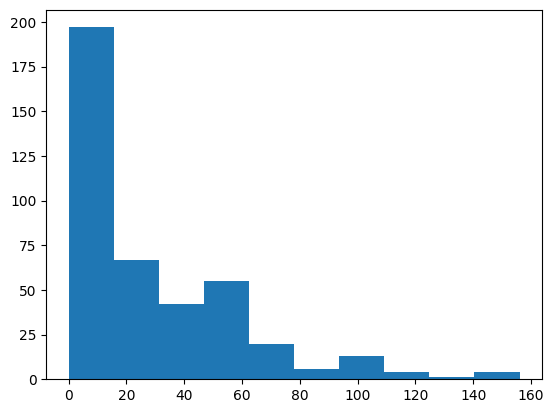

In [144]:
plt.hist(combined_formatted[combined_formatted["Blood Products"]==1]["hour"])

In [119]:
combined_formatted[combined_formatted["Urinalysis"]==1]

,hadm_id,hour,ABG,Insulin,Calcium,Blood Products,Antibiotics,Electrolytes,Glucose,Discharged,CBC,Urinalysis
47,27342858,60,1,0,1,0,0,1,1,0,1,1
102,22669333,48,0,0,0,0,0,0,0,0,0,1
159,26105884,60,0,0,0,0,0,1,0,0,1,1
214,25364518,48,0,1,0,0,0,0,0,0,0,1
230,26986535,72,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
12806,21600233,120,0,0,0,0,0,1,0,0,1,1
12824,27391981,0,1,0,0,0,0,1,1,0,1,1
12830,27391981,72,1,0,1,0,0,1,1,0,1,1
12831,27391981,84,1,0,1,1,0,1,1,0,1,1


In [113]:
combined_formatted_1[combined_formatted_1["Urinalysis"]==1]

,hadm_id,hour,ABG,Insulin,Calcium,Blood Products,Antibiotics,Electrolytes,Glucose,Discharged,CBC,Urinalysis
47,27342858,60,1,0,1,0,0,1,1,0,1,1
102,22669333,48,0,0,0,0,0,0,0,0,0,1
159,26105884,60,0,0,0,0,0,1,0,0,1,1
214,25364518,48,0,1,0,0,0,0,0,0,0,1
230,26986535,72,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
12712,29235164,0,0,0,0,0,0,0,0,0,0,1
12772,22245351,48,0,0,0,0,0,0,0,0,0,1
12824,27391981,0,1,0,0,0,0,1,1,0,1,1
12830,27391981,72,1,0,1,0,0,1,1,0,1,1


In [143]:
combined_formatted_1[combined_formatted_1["Blood Products"]==1]

,hadm_id,hour,ABG,Insulin,Calcium,Blood Products,Antibiotics,Electrolytes,Glucose,Discharged,CBC,Urinalysis
114,28821526,24,0,0,0,1,1,0,0,0,1,0
115,28821526,36,0,0,0,1,0,1,1,0,1,0
141,28522522,12,1,1,0,1,1,1,1,0,1,0
182,27013153,0,1,0,1,1,0,1,1,0,1,0
183,27013153,12,1,0,1,1,1,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
12831,27391981,84,1,0,1,1,0,1,1,0,1,1
12832,27391981,96,1,0,0,1,0,1,1,0,1,0
12853,22132718,12,1,0,1,1,1,1,1,0,1,0
12854,22132718,24,1,0,1,1,0,1,0,0,1,0


In [ ]:
# dataset for the first three days not worrying about discharge time

In [147]:
combined_72 = combined_formatted.drop(['Discharged'], axis=1)

In [151]:
combined_72 = combined_72[combined_72["hour"]<=72]

In [167]:
combined_train_ids, combined_test_ids = train_test_split(list(set(combined_formatted["hadm_id"])), test_size=0.3, random_state=499)
combined_train = combined_formatted[combined_formatted["hadm_id"].isin(combined_train_ids)]
combined_test = combined_formatted[combined_formatted["hadm_id"].isin(combined_test_ids)]
combined_train.to_csv('data_72_12_train.csv',index=False)
combined_test.to_csv('data_72_12_test.csv',index=False)

In [153]:
#combined_72.to_csv('data_72_12.csv',index=False)

In [173]:
len(list(set(combined_test["hadm_id"])))

277

In [21]:
# dataset 2 [use a larger set of features...]

In [9]:
labLabels = {"lymphocytes":"CBC", "neutrophil":"CBC", "eosinophil":"CBC","basophil":"CBC",
    "hemoglobin":"CBC", "hematocrit":"CBC", "blood cells":"CBC", "mc":"CBC", "blood":"CBC" , "platelet":"CBC", "rdw":"CBC", "rbc":"CBC", "wbc":"CBC",'poikilocytosis':"CBC", 'hypochromia':"CBC", "microcytes":"CBC", 'polychromasia':"CBC", 'anisocytosis':"CBC", 'macrocytes':"CBC", "monocyte":"CBC",
                 "o2":"ABG", "base excess":"ABG", "oxygen":"ABG",
             "ventilat":"Ventilation", "lactate":"Lactate",
                 "calcium":"Calcium",
                 "potassium":"Electrolytes", "chloride":"Electrolytes", "sodium":"Electrolytes", 
                 "cholesterol":"Cholesterol",
                 "glucose":"Glucose",
                 "hepatitis":"Hepatitis", "hiv":"HIV",
                 "bilirubin":"Bilirubin",
                 "ptt":"PT", "inr(pt)":"PT",
                 "aminotransferase":"Aminotransferase",
                 "lymph":"Leukocytes", "eosinophils":"Leukocytes", "monocytes":"Leukocytes", "neutrophils":"Leukocytes","basophils":"Leukocytes", "granulocytes":"Leukocytes", "metamyelocytes":"Leukocytes", "myelocytes":"Leukocytes",
                 #"bilirubin":"Urinalysis", "protein":"Urinalysis","specific gravity":"Urinalysis","ketone":"Urinalysis","urine":"Urinalysis","leukocytes":"Urinalysis", "nitrite":"Urinalysis","urobilinogen":"urinalysis", "creatinine":"urinalysis", "uric":"urinalysis", "urea":"urinalysis", "epithelial cells":"urinalysis", "yeast":"urinalysis", "bacteria":"urinalysis",
                 "amylase":"Pancreatic enzymes", "lipase":"Pancreatic enzymes"
                }

In [10]:
labData_120_large = keepfirstnhours(labData, 120,"charttime")

In [11]:
labGroups2 = {}
for event in list(set(labData_120_large["label1"])):
    if "Urine" in event: labGroups2[event]="Urinalysis"
    if "Pleural" in event: labGroups2[event]="Pleural"
    if event == "ph Blood": labGroups2[event]="ABG"
    else:
        for l in labLabels:
            if l in event:
                labGroups2[event] = labLabels[l]
    if event not in labGroups2.keys(): labGroups2[event] = event
        
    

In [12]:
labData_120_grouped_large = labData_120_large.replace({"label1": labGroups2})

In [13]:
keep = list(labData_120_grouped_large["label1"].value_counts()[labData_120_grouped_large["label1"].value_counts() > 100].index)

In [14]:
# remove irrelevant events
keep.remove('h Blood')
keep.remove('l Blood')
keep.remove('i Blood')
keep.remove('green top hold (plasma) Blood')

In [15]:
labData_120_large_final = labData_120_grouped_large[labData_120_grouped_large['label1'].isin(keep)]

In [16]:
set(labData_120_large_final["label1"])

{'ABG',
 'Aminotransferase',
 'Bilirubin',
 'CBC',
 'Calcium',
 'Electrolytes',
 'Glucose',
 'Lactate',
 'Leukocytes',
 'PT',
 'Pancreatic enzymes',
 'Urinalysis',
 'Ventilation',
 'albumin Blood',
 'alkaline phosphatase Blood',
 'anion gap Blood',
 'bicarbonate Blood',
 'creatinine Blood',
 'estimated gfr (mdrd equation) Blood',
 'fibrinogen functional Blood',
 'intubated Blood',
 'magnesium Blood',
 'peep Blood',
 'phosphate Blood',
 'pt Blood',
 'specimen type Blood',
 'temperature Blood',
 'urea nitrogen Blood'}

In [57]:
temp = labData_120_large_final[labData_120_large_final["hadm_id"]==	22325703]
drawtrajectory1(temp, "hour", "label1","label1",'', False)

NameError: name 'drawtrajectory1' is not defined

In [18]:
medicationData1 = pd.read_csv("inputevents_all.csv")

In [59]:
medicationData1

,hadm_id,admittime,starttime,label,category,ordercategoryname
0,26095542,2118-12-21 10:45:00,2118-12-25 03:30:00,Free Water,Fluids/Intake,14-Oral/Gastric Intake
1,26095542,2118-12-21 10:45:00,2118-12-25 03:00:00,Free Water,Fluids/Intake,14-Oral/Gastric Intake
2,20850175,2175-07-07 08:00:00,2175-07-07 19:59:00,Vancomycin,Antibiotics,08-Antibiotics (IV)
3,23027623,2142-12-31 20:37:00,2143-01-06 08:00:00,Vancomycin,Antibiotics,08-Antibiotics (IV)
4,26307293,2134-06-29 07:15:00,2134-06-30 08:45:00,Vancomycin,Antibiotics,08-Antibiotics (IV)
...,...,...,...,...,...,...
100875,29183222,2162-06-07 00:00:00,2162-06-07 12:27:00,Phenylephrine (50/250),Medications,01-Drips
100876,21235589,2162-09-21 00:00:00,2162-09-21 16:22:00,Phenylephrine (50/250),Medications,01-Drips
100877,26593663,2150-12-12 07:15:00,2150-12-29 18:34:00,Nepro (Full),Nutrition - Enteral,13-Enteral Nutrition
100878,23427760,2144-01-06 11:45:00,2144-01-15 17:44:00,Nepro (Full),Nutrition - Enteral,13-Enteral Nutrition


In [19]:
medData_120 = keepfirstnhours(medicationData1, 120,"starttime")

In [20]:
medLabels = {"09-Antibiotics (Non IV)":"Antibiotics",
            "08-Antibiotics (IV)":"Antibiotics",
            "11-Prophylaxis (Non IV)": "Prophylaxis",
             "10-Prophylaxis (IV)":"Prophylaxis",
            "06-Insulin (Non IV)":"Insulin",
            "01-Drips":"Drips",
            "05-Med Bolus":"Med Bolus",
            "02-Fluids (Crystalloids)":"Fluids",
            "14-Oral/Gastric Intake":"Intake",
            "04-Fluids (Colloids)":"Fluids",
            "07-Blood Products":"Blood Products",
            "03-IV Fluid Bolus":"Fluid Bolus"}

In [21]:
medData_120_grouped_large = medData_120.replace({"ordercategoryname": medLabels})

In [22]:
medData_120_grouped_large=medData_120_grouped_large[medData_120_grouped_large["ordercategoryname"] != "13-Enteral Nutrition"]

In [23]:
medData_120_grouped_large=medData_120_grouped_large[medData_120_grouped_large["ordercategoryname"] != "16-Pre Admission/Non-ICU"]

In [24]:
medData_120_grouped_large["ordercategoryname"].value_counts()

ordercategoryname
Drips             48466
Fluids            12294
Med Bolus         11705
Antibiotics        5072
Intake             3850
Insulin            3308
Fluid Bolus        2931
Prophylaxis         866
Blood Products      690
Name: count, dtype: int64

In [66]:
medData_120_grouped_large["label1"] = medData_120_grouped_large["ordercategoryname"]

In [67]:
# combined data
labData_120_cols = labData_120_large_final[["hadm_id", "hour", "label1"]]
medicationData_120_cols = medData_120_grouped_large[["hadm_id", "hour", "label1"]]
#dischargeData_168_cols = dischargeData_168[["hadm_id", "hour", "label1"]]

combined = pd.concat([labData_120_cols, medicationData_120_cols])

In [68]:
combined_formatted = reformathourlybuckets(combined, 2)

In [69]:
combined_formatted.columns

Index(['hadm_id', 'hour', 'fibrinogen functional Blood', 'phosphate Blood',
       'Antibiotics', 'anion gap Blood', 'urea nitrogen Blood',
       'specimen type Blood', 'Calcium', 'alkaline phosphatase Blood',
       'Lactate', 'intubated Blood', 'PT', 'Insulin', 'Intake', 'Ventilation',
       'temperature Blood', 'pt Blood', 'albumin Blood', 'Drips', 'CBC', 'ABG',
       'creatinine Blood', 'peep Blood', 'Glucose', 'Blood Products',
       'Med Bolus', 'Electrolytes', 'Prophylaxis', 'bicarbonate Blood',
       'Fluids', 'Urinalysis', 'Bilirubin', 'Aminotransferase', 'Fluid Bolus',
       'magnesium Blood', 'Pancreatic enzymes', 'Leukocytes',
       'estimated gfr (mdrd equation) Blood'],
      dtype='object')

In [42]:
# remove hadm_ids that dont have a discharge time
#remove = combined_formatted.groupby(['hadm_id'])['Discharged'].sum()
#remove = remove[remove==0]
#remove = remove.reset_index()
#remove = list(remove["hadm_id"])
#combined_formatted = combined_formatted[~combined_formatted["hadm_id"].isin(remove)]

KeyError: 'Column not found: Discharged'

In [70]:
combined_train_ids, combined_test_ids = train_test_split(list(set(combined_formatted["hadm_id"])), test_size=0.3, random_state=499)
combined_train = combined_formatted[combined_formatted["hadm_id"].isin(combined_train_ids)]
combined_test = combined_formatted[combined_formatted["hadm_id"].isin(combined_test_ids)]
combined_train.to_csv('data_120_2_large_train.csv',index=False)
combined_test.to_csv('data_120_2_large_test.csv',index=False)

In [84]:
def preprocess(n,bucket,dischargedata=True):
    labData = pd.read_csv("labevents.csv")
    labData["label"] = labData["label"].str.lower()
    labData = labData.replace(',','', regex=True)
    labData["label"]= labData["label"].str.replace(r"^ +| +$", r"", regex=True)
    labData["label1"] = labData["label"] + " " + labData["fluid"]
    # just keep the first n hours
    labData_hours = keepfirstnhours(labData, n,"charttime")
    labGroups = {}
    for event in list(set(labData_hours["label1"])):
        if "Urine" in event: labGroups[event]="Urinalysis"
        elif event == "ph Blood": labGroups[event]="ABG"
        else:
            for l in labLabels:
                if l in event:
                    labGroups[event] = labLabels[l]
    # remove rows that have not been grouped
    labData_hours_grouped = labData_hours[labData_hours['label1'].isin(labGroups.keys())]

    # map group labels to data
    labData_hours_grouped = labData_hours_grouped.replace({"label1": labGroups})
    
    medicationData = pd.read_csv("inputevents.csv")
    medicationData["label1"] = medicationData["ordercategoryname"]
    medicationLabels = {'06-Insulin (Non IV)':"Insulin", 
                        '07-Blood Products':"Blood Products", 
                        '08-Antibiotics (IV)':"Antibiotics",
                        '09-Antibiotics (Non IV)':"Antibiotics"}
    # keep first 3 days after admission time
    medicationData_hours = keepfirstnhours(medicationData, n,"starttime")
    medicationData_hours_grouped = medicationData_hours.replace({"label1": medicationLabels})
    
    # combined data
    labData_hours_cols = labData_hours_grouped[["hadm_id", "hour", "label1"]]
    medicationData_hours_cols = medicationData_hours_grouped[["hadm_id", "hour", "label1"]]
    
    if dischargedata:
        dischargeData = pd.read_csv("admissionevents.csv")
        dischargeData["label1"] = "Discharged"
        dischargeData_hours = keepfirstnhours(dischargeData, n,"dischtime")
        dischargeData_hours_cols = dischargeData_hours[["hadm_id", "hour", "label1"]]
        combined = pd.concat([labData_hours_cols, medicationData_hours_cols, dischargeData_hours_cols])
    else:
        combined = pd.concat([labData_hours_cols, medicationData_hours_cols])
    
    # one-hot encode
    combined_formatted = reformathourlybuckets(combined, bucket)
    # save to csv
    name= "data_"+str(n)+"_"+str(bucket)
    combined_train_ids, combined_test_ids = train_test_split(list(set(combined_formatted["hadm_id"])), test_size=0.3, random_state=499)
    combined_train = combined_formatted[combined_formatted["hadm_id"].isin(combined_train_ids)]
    combined_test = combined_formatted[combined_formatted["hadm_id"].isin(combined_test_ids)]
    combined_train.to_csv(name+'_train.csv',index=False)
    combined_test.to_csv(name+'_test.csv',index=False)
    combined_test.groupby('hour').sum().to_csv('eval.csv',index=False)
    return combined, combined_formatted


In [85]:
combined, combined_formatted=preprocess(120,2, False)

In [77]:
x=combined[(combined["label1"]=="Discharged")]

In [80]:
x

,hadm_id,hour,label1
0,28108097,95,Discharged
1,24824855,100,Discharged
2,20050936,106,Discharged
3,29227687,128,Discharged
4,20736900,200,Discharged
...,...,...,...
916,22427428,111,Discharged
917,22525882,102,Discharged
918,25977623,113,Discharged
919,24175061,138,Discharged


In [82]:
x["hour"].std()

49.329155155117654

In [62]:
t=combined[(combined["label1"]=="Discharged") & (combined["hour"]<160) ]

In [72]:
combined

,hadm_id,hour,label1
0,28737610,4,ABG
1,22325703,7,Calcium
2,20468701,7,Calcium
3,20468701,69,CBC
4,28487115,0,ABG
...,...,...,...
916,22427428,111,Discharged
917,22525882,102,Discharged
918,25977623,113,Discharged
919,24175061,138,Discharged


In [71]:
combined[combined["hour"]<=160]

,hadm_id,hour,label1
0,28737610,4,ABG
1,22325703,7,Calcium
2,20468701,7,Calcium
3,20468701,69,CBC
4,28487115,0,ABG
...,...,...,...
916,22427428,111,Discharged
917,22525882,102,Discharged
918,25977623,113,Discharged
919,24175061,138,Discharged


In [73]:
198482/211684

0.9376334536384422

46.707890062546056

In [70]:
752/921

0.8165038002171553

In [67]:
t.sort_values(by=['hour'])

,hadm_id,hour,label1,c
351,28483781,73,Discharged,1
119,25278650,77,Discharged,1
427,28925117,78,Discharged,1
309,29867673,78,Discharged,1
809,26262347,80,Discharged,1
...,...,...,...,...
596,20739167,156,Discharged,1
901,22376294,156,Discharged,1
896,23513784,158,Discharged,1
289,28906889,158,Discharged,1


In [66]:
t

,hadm_id,hour,label1,c
0,28108097,95,Discharged,1
1,24824855,100,Discharged,1
2,20050936,106,Discharged,1
3,29227687,128,Discharged,1
6,23853360,103,Discharged,1
...,...,...,...,...
916,22427428,111,Discharged,1
917,22525882,102,Discharged,1
918,25977623,113,Discharged,1
919,24175061,138,Discharged,1


In [ ]:
# 454

In [55]:
combined_formatted.groupby(['hour']).cumsum()

,hadm_id,Electrolytes,Lactate,Urinalysis,PT,Calcium,Blood Products,Ventilation,CBC,Leukocytes,...,Pancreatic enzymes,Bilirubin,Glucose,HIV,Discharged,Aminotransferase,Insulin,Hepatitis,ABG,Cholesterol
0,27604995,1,1,0,0,1,0,1,1,0,...,0,0,1,0,0,0,0,0,1,0
1,27604995,1,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,1,0
2,27604995,1,1,0,1,1,0,1,1,0,...,0,0,1,0,0,0,0,0,1,0
3,27604995,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,27604995,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55255,23157237249,39,7,0,22,22,2,0,33,1,...,2,2,38,0,20,2,5,0,14,0
55256,23157237249,50,6,2,28,18,1,1,46,1,...,2,2,44,0,8,3,6,0,8,0
55257,23157237249,61,8,0,31,32,1,1,56,2,...,5,6,54,0,0,6,5,0,16,0
55258,23157237249,78,6,1,22,20,2,1,75,3,...,3,2,61,0,2,4,13,1,9,0


In [33]:
combined_formatted.groupby(['hour']).cumsum()["Discharged"]

0         0
1         0
2         0
3         0
4         0
         ..
55255    20
55256     8
55257     0
55258     2
55259    11
Name: Discharged, Length: 55260, dtype: int64

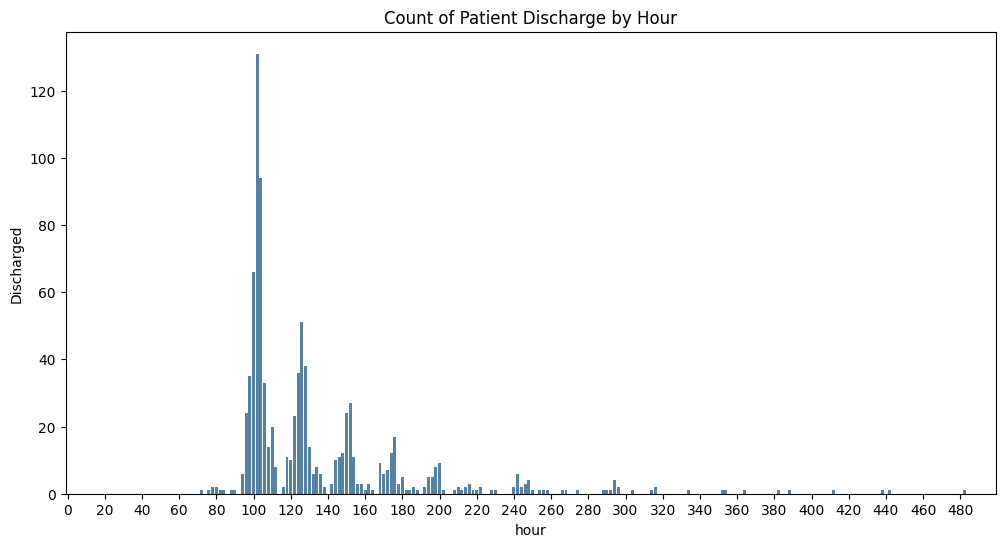

In [294]:
temp = combined_formatted.groupby(['hour']).sum()["Discharged"].reset_index()
plt.figure(figsize=(12, 6))
plot = sns.barplot(temp, x="hour", y="Discharged", color='steelblue')
new_ticks = [i.get_text() for i in plot.get_xticklabels()]
plt.xticks(range(0, len(new_ticks), 10), new_ticks[::10])
plt.title("Count of Patient Discharge by Hour")
plt.show()

In [314]:
def getproportiondischarged(data):
    propdict = {}
    proptable = []
    total = len(set(data["hadm_id"]))
    for i in range(0,500,24):
        withintime = data[data["hour"]<i]
        propdict[i] = round((sum(withintime["Discharged"])/total)*100,2)
        proptable.append([i, round((sum(withintime["Discharged"])/total)*100,2)])
    
    table = pd.DataFrame(proptable, columns=['hour','proportion'])
    table.to_csv("proportiondischarged.csv")
    return propdict

def getproportionevents(data):
    propdict = {}
    proptable = []
    total = len(data["hadm_id"])
    for i in range(0,300,24):
        withintime = data[data["hour"]<i]
        propdict[i] = round(len(withintime)/total)*100,2)
        proptable.append([i,  round(len(withintime)/total)*100,2)])
    
    table = pd.DataFrame(proptable, columns=['hour','proportion'])
    table.to_csv("proportiondischarged.csv")
    return propdict

In [341]:
combined

,hadm_id,hour,label1
0,28737610,4,ABG
1,22325703,7,Calcium
2,20468701,7,Calcium
4,28487115,0,ABG
5,28487115,6,ABG
...,...,...,...
916,22427428,111,Discharged
917,22525882,102,Discharged
918,25977623,113,Discharged
919,24175061,138,Discharged


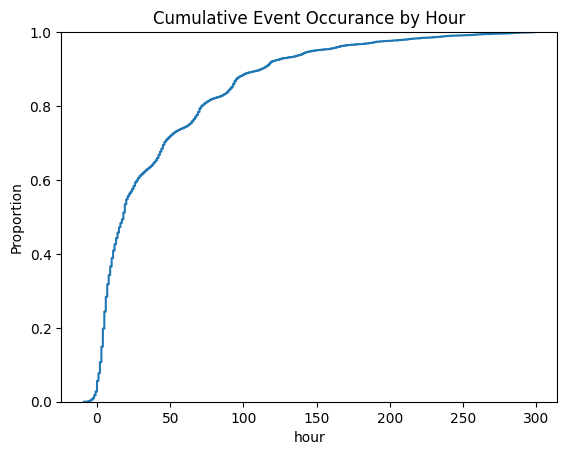

In [342]:
sns.ecdfplot(data=combined, x="hour")
plt.title("Cumulative Event Occurance by Hour")
plt.show()

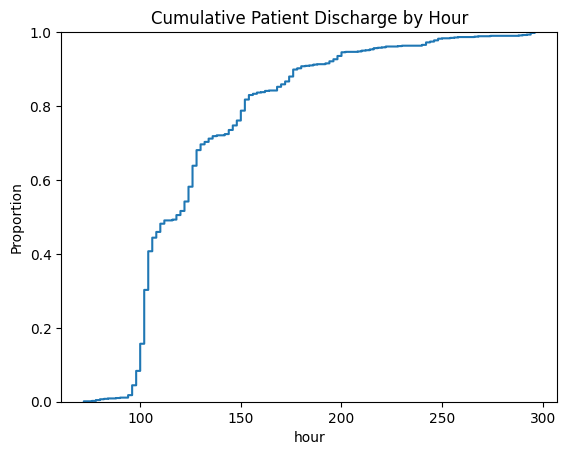

In [325]:
dischargeprop = combined_formatted[combined_formatted["Discharged"]==1]
sns.ecdfplot(data=dischargeprop, x="hour")
plt.title("Cumulative Patient Discharge by Hour")
plt.show()

In [315]:
getproportiondischarged(combined_formatted)

{0: 0.0,
 24: 0.0,
 48: 0.0,
 72: 0.0,
 96: 1.74,
 120: 49.29,
 144: 70.68,
 168: 82.19,
 192: 89.14,
 216: 93.05,
 240: 94.03,
 264: 96.31,
 288: 96.63,
 312: 97.72,
 336: 98.15,
 360: 98.37,
 384: 98.59,
 408: 98.7,
 432: 98.81,
 456: 99.02,
 480: 99.02}

In [311]:
proptable

[[0, 0.0],
 [24, 0.0],
 [48, 0.0],
 [72, 0.0],
 [96, 1.74],
 [120, 49.29],
 [144, 70.68],
 [168, 82.19],
 [192, 89.14],
 [216, 93.05],
 [240, 94.03],
 [264, 96.31],
 [288, 96.63],
 [312, 97.72],
 [336, 98.15],
 [360, 98.37],
 [384, 98.59],
 [408, 98.7],
 [432, 98.81],
 [456, 99.02],
 [480, 99.02]]

In [11]:
# dataset 3 [just have the first three days 72 hours]
labData_168 = keepfirstnhours(labData, 168,"charttime")
labLabels = {"lymphocytes":"CBC", "neutrophils":"CBC", "eosinophils":"CBC",
    "hemoglobin":"CBC", "hematocrit":"CBC", "blood cells":"CBC", "mc":"CBC", "blood":"CBC" , "platelet":"CBC", "rdw":"CBC", "rbc":"CBC", "wbc":"CBC",'poikilocytosis':"CBC", 'hypochromia':"CBC", "microcytes":"CBC", 'polychromasia':"CBC", 'anisocytosis':"CBC", 'macrocytes':"CBC", "monocyte":"CBC",
                "o2":"ABG", "base excess":"ABG", "oxygen":"ABG","alveolar-arterial":"ABG",
                "calcium":"Calcium",
                "potassium":"Electrolytes", "chloride":"Electrolytes", "sodium":"Electrolytes", 
                 "glucose":"Glucose"}

In [12]:
labGroups = {}
for event in list(set(labData_168["label1"])):
    if "Urine" in event: labGroups[event]="Urinalysis"
    elif event == "ph Blood": labGroups[event]="ABG"
    else:
        for l in labLabels:
            if l in event:
                labGroups[event] = labLabels[l]
    

In [234]:
# remove rows that have not been grouped
labData_72_grouped = labData_72[labData_72['label1'].isin(labGroups.keys())]

# map group labels to data
labData_72_grouped = labData_72_grouped.replace({"label1": labGroups})

In [235]:
medicationData["label1"] = medicationData["ordercategoryname"]
medicationLabels = {'06-Insulin (Non IV)':"Insulin", 
                    '07-Blood Products':"Blood Products", 
                    '08-Antibiotics (IV)':"Antibiotics",
                    '09-Antibiotics (Non IV)':"Antibiotics"}

In [236]:
# keep first 3 days after admission time
medicationData_72 = keepfirstnhours(medicationData, 72,"starttime")
medicationData_72_grouped = medicationData_72.replace({"label1": medicationLabels})

In [237]:
# combined data
labData_72_cols = labData_72_grouped[["hadm_id", "hour", "label1"]]
medicationData_72_cols = medicationData_72_grouped[["hadm_id", "hour", "label1"]]

combined = pd.concat([labData_72_cols, medicationData_72_cols])

In [238]:
combined_formatted = reformathourlybuckets(combined, 2)

In [239]:
combined_train_ids, combined_test_ids = train_test_split(list(set(combined_formatted["hadm_id"])), test_size=0.3, random_state=499)
combined_train = combined_formatted[combined_formatted["hadm_id"].isin(combined_train_ids)]
combined_test = combined_formatted[combined_formatted["hadm_id"].isin(combined_test_ids)]
combined_train.to_csv('data_72_2_train.csv',index=False)
combined_test.to_csv('data_72_2_test.csv',index=False)